In [4]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [3]:
# %run ../Combined_Features/COLD_HINGE_Compo.ipynb

In [1]:
%run ../Features/FindHINGEFeatures.ipynb


100%|██████████| 91/91 [00:15<00:00,  5.83it/s]


## Random Forest - Training

In [5]:
# Boost 100 weak decision trees
model = RandomForestClassifier(n_estimators=100)
#GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

model = model.fit(x_train, y_train)

## Random Forest - Testing

In [6]:
predictions = model.predict(x_test)
acc = {metrics.accuracy_score(y_test, predictions) * 100}
print(f" Model Accuracy is {acc}")

 Model Accuracy is {86.81318681318682}


## Cross Validation

In [6]:
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

print(x_data.shape)
accuracies = []

for i in tqdm(range(1, 5)):
   p = np.random.permutation(len(x_data))
   x_data = x_data[p]
   y_data = y_data[p]
   model = RandomForestClassifier(n_estimators=300)
   scores = cross_val_score(model, x_data, y_data, cv=5)
   accuracies.append(scores.mean() * 100)

accuracies = np.array(accuracies)
print(f" Model Accuracy by Cross Validation is {np.mean(accuracies)}%")


(362, 780)


100%|██████████| 4/4 [00:14<00:00,  3.61s/it]

 Model Accuracy by Cross Validation is 81.8369482496195%


Model With PCA

In [8]:
accuracies = np.empty(10)
nums = np.arange(10,110,10)
for i in range(10,110,10):
    pca = PCA(n_components=i)
    train_data = pca.fit_transform(x_train)
    test_data = pca.transform(x_test)
    model = RandomForestClassifier(n_estimators=300)
    model = model.fit(train_data, y_train)
    predictions = model.predict(test_data)
    acc = metrics.accuracy_score(y_test, predictions) * 100
    accuracies [int(i/100-1)]= acc
    print(f" Model Accuracy is ",acc)



 Model Accuracy is  86.81318681318682
 Model Accuracy is  84.61538461538461
 Model Accuracy is  90.10989010989012
 Model Accuracy is  86.81318681318682
 Model Accuracy is  89.01098901098901
 Model Accuracy is  86.81318681318682
 Model Accuracy is  86.81318681318682
 Model Accuracy is  84.61538461538461
 Model Accuracy is  84.61538461538461
 Model Accuracy is  86.81318681318682


Ploting PCA accuracies

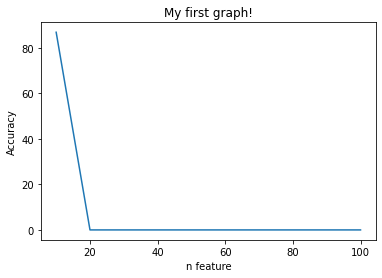

In [9]:
# plotting the points 
plt.plot(nums, accuracies)

# naming the x axis
plt.xlabel('n feature')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()